In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/netflix1.csv')
pd.options.display.min_rows = 12

In [3]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...,...,...,...
8784,s8796,TV Show,Yu-Gi-Oh! Arc-V,Not Given,Japan,5/1/2018,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV"
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV


# Setting index corresponding to original dataset

In [4]:
df.show_id.str[0].str.isalpha().sum()

8790

In [5]:
df.show_id = df.show_id.str[1:].astype(int)
df = df.set_index('show_id').sort_index()
df

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
2,TV Show,Blood & Water,Not Given,South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
5,TV Show,Kota Factory,Not Given,India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zinzana,Majid Al Ansari,United Arab Emirates,3/9/2016,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
8803,Movie,Zodiac,David Fincher,United States,11/20/2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers"


# Fixing date format

In [6]:
df.date_added = pd.to_datetime(df['date_added'])
df.dtypes

type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# Exploratory data analysis
## Searching for most popular directors

In [7]:
df.director.value_counts().nlargest(20)

Not Given                       2588
Rajiv Chilaka                     20
Raúl Campos, Jan Suter            18
Alastair Fothergill               18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
Cathy Garcia-Molina               13
Martin Scorsese                   12
Youssef Chahine                   12
Jay Chapman                       12
Steven Spielberg                  11
Don Michael Paul                  10
Mark Thornton, Todd Kauffman      10
David Dhawan                       9
Shannon Hartman                    8
Fernando Ayllón                    8
Yılmaz Erdoğan                     8
Johnnie To                         8
Troy Miller                        8
Name: director, dtype: int64

In [8]:
df.insert(3, 'n_directed', 0)
df.n_directed = df.groupby('director')['director'].transform('count')

In [9]:
df.query('director == "Rajiv Chilaka"').count()[0]

20

In [10]:
df.insert(4, 'director_known', 0)
df.director_known = (df.n_directed > 5) & (df.director != 'Not Given')
df.director_known.value_counts()

False    8313
True      477
Name: director_known, dtype: int64

In [11]:
df.query('director_known == True')

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,,
30,Movie,Paranoia,Robert Luketic,6,True,United States,2021-09-19,2013,PG-13,106 min,Thrillers
40,TV Show,Chhota Bheem,Rajiv Chilaka,20,True,India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV
42,Movie,Jaws,Steven Spielberg,11,True,United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,7,True,Japan,2021-09-15,2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio..."
53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,7,True,Japan,2021-09-15,2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio..."
54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,7,True,Japan,2021-09-15,2004,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio..."
...,...,...,...,...,...,...,...,...,...,...,...
8683,Movie,Vizontele Tuuba,Yılmaz Erdoğan,8,True,Turkey,2017-03-10,2004,NR,106 min,"Comedies, Dramas, International Movies"
8697,Movie,War Horse,Steven Spielberg,11,True,United States,2019-05-06,2011,PG-13,147 min,Dramas


## Splitting duration into show and movie specific

In [12]:
df.duration.str.contains('Season').sum() + df.duration.str.contains('min').sum()

8790

In [13]:
df.insert(10, 'show_n_seasons', 0)
df.insert(11, 'movie_dur_min', 0)

In [14]:
df.show_n_seasons = df.duration.where(df.duration.str.contains('Season'))
df.movie_dur_min = df.duration.where(df.duration.str.contains('min'))
df = df.drop('duration', axis='columns')

In [15]:
df.show_n_seasons = df.show_n_seasons.str.replace(r'[^0-9]', '').astype('float')
df.movie_dur_min = df.movie_dur_min.str.replace(r'[^0-9]', '').astype('float')
df

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_14772/2719161749.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.show_n_seasons = df.show_n_seasons.str.replace(r'[^0-9]', '').astype('float')
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_14772/2719161749.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.movie_dur_min = df.movie_dur_min.str.replace(r'[^0-9]', '').astype('float')


,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,1,False,United States,2021-09-25,2020,PG-13,NaN,90.0,Documentaries
2,TV Show,Blood & Water,Not Given,2588,False,South Africa,2021-09-24,2021,TV-MA,2.0,NaN,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Ganglands,Julien Leclercq,3,False,France,2021-09-24,2021,TV-MA,1.0,NaN,"Crime TV Shows, International TV Shows, TV Act..."
4,TV Show,Jailbirds New Orleans,Not Given,2588,False,Pakistan,2021-09-24,2021,TV-MA,1.0,NaN,"Docuseries, Reality TV"
5,TV Show,Kota Factory,Not Given,2588,False,India,2021-09-24,2021,TV-MA,2.0,NaN,"International TV Shows, Romantic TV Shows, TV ..."
6,TV Show,Midnight Mass,Mike Flanagan,4,False,United States,2021-09-24,2021,TV-MA,1.0,NaN,"TV Dramas, TV Horror, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zinzana,Majid Al Ansari,1,False,United Arab Emirates,2016-03-09,2015,TV-MA,NaN,96.0,"Dramas, International Movies, Thrillers"
8803,Movie,Zodiac,David Fincher,6,True,United States,2019-11-20,2007,R,NaN,158.0,"Cult Movies, Dramas, Thrillers"


## Working on listed_in categories

In [16]:
df.listed_in.str.contains('Cult').sum()

97

In [17]:
df.query('listed_in.str.contains("Cult") & director == "Not Given" & 2010 <= release_year <= 2015', engine='python')

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
5364,TV Show,The IT Crowd,Not Given,2588,False,United Kingdom,2017-08-01,2013,TV-MA,5.0,NaN,"British TV Shows, Classic & Cult TV, Internati..."
6942,TV Show,Haven,Not Given,2588,False,Canada,2015-09-08,2015,TV-14,5.0,NaN,"Classic & Cult TV, TV Horror, TV Mysteries"
7258,TV Show,La Rosa de Guadalupe,Not Given,2588,False,Mexico,2019-01-15,2010,TV-PG,1.0,NaN,"Classic & Cult TV, Crime TV Shows, Internation..."


In [18]:
df.query('type == "Movie" & 2 < n_directed < 10')

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
14,Movie,Confessions of an Invisible Girl,Bruno Garotti,4,False,Brazil,2021-09-22,2021,TV-PG,NaN,91.0,"Children & Family Movies, Comedies"
24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore",3,False,United States,2021-09-21,2021,TV-Y,NaN,61.0,Children & Family Movies
27,Movie,Minsara Kanavu,Rajiv Menon,3,False,India,2021-09-21,1997,TV-PG,NaN,147.0,"Comedies, International Movies, Music & Musicals"
28,Movie,Grown Ups,Dennis Dugan,4,False,United States,2021-09-20,2010,PG-13,NaN,103.0,Comedies
30,Movie,Paranoia,Robert Luketic,6,True,United States,2021-09-19,2013,PG-13,NaN,106.0,Thrillers
49,Movie,Training Day,Antoine Fuqua,4,False,United States,2021-09-16,2001,R,NaN,122.0,"Dramas, Thrillers"
...,...,...,...,...,...,...,...,...,...,...,...,...
8769,Movie,Y Tu Mamá También,Alfonso Cuarón,3,False,Mexico,2017-06-01,2001,R,NaN,106.0,"Dramas, Independent Movies, International Movies"
8771,Movie,Yaadein,Subhash Ghai,4,False,India,2018-03-01,2001,TV-14,NaN,171.0,"Dramas, International Movies, Romantic Movies"


In [19]:
df_check = df.query('(country == "India" | country == "Pakistan") & date_added > "2019-10-10"')
df_check.query('date_added <= "2019-10-10"')

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,


In [20]:
df['listed_in'].str.split(', ', expand=True).stack().value_counts()

International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

In [21]:
df.listed_in = df.listed_in.str.replace('TV','')
df.listed_in = df.listed_in.str.replace('Shows','')
df.listed_in = df.listed_in.str.replace('Movies','')
df.listed_in = df.listed_in.str.replace('','')
df.listed_in = df.listed_in.replace(r'\s+', ' ', regex=True)
df

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,1,False,United States,2021-09-25,2020,PG-13,NaN,90.0,Documentaries
2,TV Show,Blood & Water,Not Given,2588,False,South Africa,2021-09-24,2021,TV-MA,2.0,NaN,"International , Dramas, Mysteries"
3,TV Show,Ganglands,Julien Leclercq,3,False,France,2021-09-24,2021,TV-MA,1.0,NaN,"Crime , International , Action & Adventure"
4,TV Show,Jailbirds New Orleans,Not Given,2588,False,Pakistan,2021-09-24,2021,TV-MA,1.0,NaN,"Docuseries, Reality"
5,TV Show,Kota Factory,Not Given,2588,False,India,2021-09-24,2021,TV-MA,2.0,NaN,"International , Romantic , Comedies"
6,TV Show,Midnight Mass,Mike Flanagan,4,False,United States,2021-09-24,2021,TV-MA,1.0,NaN,"Dramas, Horror, Mysteries"
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zinzana,Majid Al Ansari,1,False,United Arab Emirates,2016-03-09,2015,TV-MA,NaN,96.0,"Dramas, International , Thrillers"
8803,Movie,Zodiac,David Fincher,6,True,United States,2019-11-20,2007,R,NaN,158.0,"Cult , Dramas, Thrillers"


In [22]:
df.listed_in = df.listed_in.str.replace('Dramas','Drama')
df.listed_in = df.listed_in.str.replace('Comedies','Comedy')
df.listed_in = df.listed_in.str.replace('Mysteries','Mystery')
df.listed_in = df.listed_in.str.replace('Docuseries','Documentaries')
df.listed_in = df.listed_in.str.replace('Documentaries','Documentary')
df.listed_in = df.listed_in.str.replace('Thrillers','Thriller')
df.listed_in = df.listed_in.str.replace('Series','')
df.listed_in = df.listed_in.str.replace(' &',',')
df.listed_in = df.listed_in.str.replace("' ",'')
df.listed_in = df.listed_in.str.replace(',','')
df.listed_in = df.listed_in.str.replace(' ',',')
df.listed_in = df.listed_in.str.replace(',,',',')
# df.listed_in.unique()

In [23]:
df.query('listed_in.str[0] == ","').listed_in.str[1:]
df

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,1,False,United States,2021-09-25,2020,PG-13,NaN,90.0,Documentary
2,TV Show,Blood & Water,Not Given,2588,False,South Africa,2021-09-24,2021,TV-MA,2.0,NaN,"International,Drama,Mystery"
3,TV Show,Ganglands,Julien Leclercq,3,False,France,2021-09-24,2021,TV-MA,1.0,NaN,"Crime,International,Action,Adventure"
4,TV Show,Jailbirds New Orleans,Not Given,2588,False,Pakistan,2021-09-24,2021,TV-MA,1.0,NaN,"Documentary,Reality,"
5,TV Show,Kota Factory,Not Given,2588,False,India,2021-09-24,2021,TV-MA,2.0,NaN,"International,Romantic,Comedy"
6,TV Show,Midnight Mass,Mike Flanagan,4,False,United States,2021-09-24,2021,TV-MA,1.0,NaN,",Drama,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zinzana,Majid Al Ansari,1,False,United Arab Emirates,2016-03-09,2015,TV-MA,NaN,96.0,"Drama,International,Thriller"
8803,Movie,Zodiac,David Fincher,6,True,United States,2019-11-20,2007,R,NaN,158.0,"Cult,Drama,Thriller"


In [24]:
df.listed_in = df.listed_in.apply(lambda x : x[1:] if x.startswith(",") else x)
df.listed_in = df.listed_in.apply(lambda x : x[:-1] if x.endswith(',') else x)
df.listed_in.unique()

array(['Documentary', 'International,Drama,Mystery',
       'Crime,International,Action,Adventure', 'Documentary,Reality',
       'International,Romantic,Comedy', 'Drama,Horror,Mystery',
       'Children,Family', 'Drama,Independent,International',
       'British,Reality', 'Comedy,Drama',
       'Crime,Documentary,International', 'Drama,International',
       'Children,Family,Comedy', 'British,Crime,Documentary',
       'Documentary,International', 'Crime,Spanish-Language,Drama',
       'Thriller', 'International,Spanish-Language,Action,Adventure',
       'International,Action,Adventure,Drama', 'Comedy,International',
       'Comedy,International,Romantic',
       'Documentary,International,Reality',
       'Comedy,International,Music,Musicals', 'Comedy',
       'Horror,Sci-Fi,Fantasy', 'British,International,Comedy',
       'International,Drama,Thriller', 'Kids',
       'Drama,International,Thriller',
       'Action,Adventure,Drama,International', 'Kids,Comedy',
       'Action,Adventu

In [25]:
df

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,1,False,United States,2021-09-25,2020,PG-13,NaN,90.0,Documentary
2,TV Show,Blood & Water,Not Given,2588,False,South Africa,2021-09-24,2021,TV-MA,2.0,NaN,"International,Drama,Mystery"
3,TV Show,Ganglands,Julien Leclercq,3,False,France,2021-09-24,2021,TV-MA,1.0,NaN,"Crime,International,Action,Adventure"
4,TV Show,Jailbirds New Orleans,Not Given,2588,False,Pakistan,2021-09-24,2021,TV-MA,1.0,NaN,"Documentary,Reality"
5,TV Show,Kota Factory,Not Given,2588,False,India,2021-09-24,2021,TV-MA,2.0,NaN,"International,Romantic,Comedy"
6,TV Show,Midnight Mass,Mike Flanagan,4,False,United States,2021-09-24,2021,TV-MA,1.0,NaN,"Drama,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zinzana,Majid Al Ansari,1,False,United Arab Emirates,2016-03-09,2015,TV-MA,NaN,96.0,"Drama,International,Thriller"
8803,Movie,Zodiac,David Fincher,6,True,United States,2019-11-20,2007,R,NaN,158.0,"Cult,Drama,Thriller"


## Displaying interesting data

<AxesSubplot:title={'center':'Most movies/shows by director'}, xlabel='director', ylabel='n_directed'>

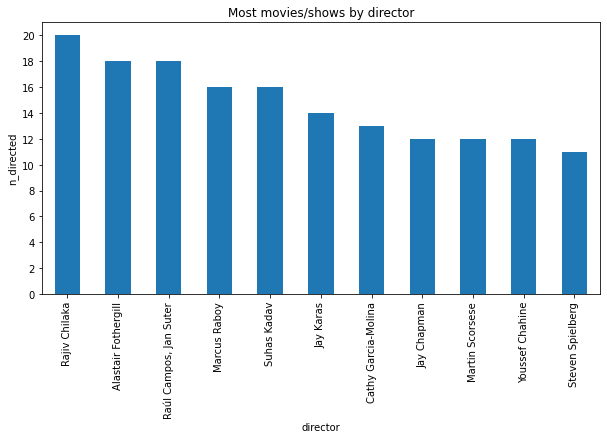

In [26]:
(df.query('director != "Not Given" & n_directed > 10')
 .groupby(by=df['director'])
 .n_directed
 .count()
 .sort_values(ascending=False)
 .plot(x='director', y='n_directed', kind='bar', ylabel='n_directed', title='Most movies/shows by director', yticks=range(0, 22, 2), figsize=(10,5))
)

<AxesSubplot:title={'center':'most movies/shows by country'}, xlabel='country', ylabel='n_directed'>

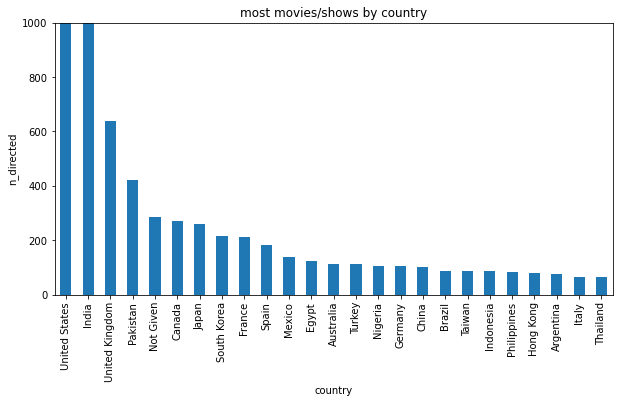

In [27]:
(df.groupby(by=['country'])
 .count()
 .query('n_directed>=50')
 .n_directed
 .sort_values(ascending=False)
 .plot(xlabel='country', ylabel='n_directed', title='most movies/shows by country', kind='bar', ylim=(0, 1000), figsize=(10,5))
)

<AxesSubplot:title={'center':'mean movie dur vs release year'}, xlabel='release_year', ylabel='mean duration, min'>

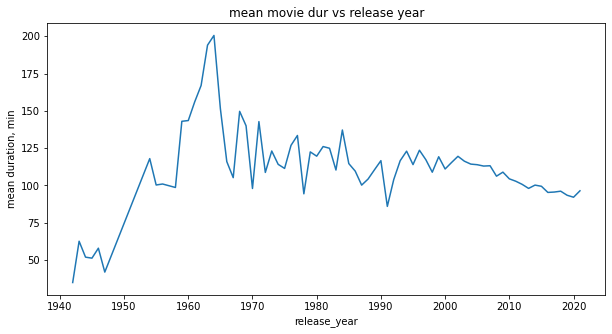

In [28]:
(df.query('type == "Movie"')
 .groupby(by=['release_year'])
 .mean()
 .movie_dur_min
 .plot(kind='line', ylabel='mean duration, min', title='mean movie dur vs release year', figsize=(10,5))
)

In [29]:
df.query('type == "Movie"').movie_dur_min.describe()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_dur_min, dtype: float64

In [30]:
df

,type,title,director,n_directed,director_known,country,date_added,release_year,rating,show_n_seasons,movie_dur_min,listed_in
show_id,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,1,False,United States,2021-09-25,2020,PG-13,NaN,90.0,Documentary
2,TV Show,Blood & Water,Not Given,2588,False,South Africa,2021-09-24,2021,TV-MA,2.0,NaN,"International,Drama,Mystery"
3,TV Show,Ganglands,Julien Leclercq,3,False,France,2021-09-24,2021,TV-MA,1.0,NaN,"Crime,International,Action,Adventure"
4,TV Show,Jailbirds New Orleans,Not Given,2588,False,Pakistan,2021-09-24,2021,TV-MA,1.0,NaN,"Documentary,Reality"
5,TV Show,Kota Factory,Not Given,2588,False,India,2021-09-24,2021,TV-MA,2.0,NaN,"International,Romantic,Comedy"
6,TV Show,Midnight Mass,Mike Flanagan,4,False,United States,2021-09-24,2021,TV-MA,1.0,NaN,"Drama,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zinzana,Majid Al Ansari,1,False,United Arab Emirates,2016-03-09,2015,TV-MA,NaN,96.0,"Drama,International,Thriller"
8803,Movie,Zodiac,David Fincher,6,True,United States,2019-11-20,2007,R,NaN,158.0,"Cult,Drama,Thriller"


<BarContainer object of 26 artists>

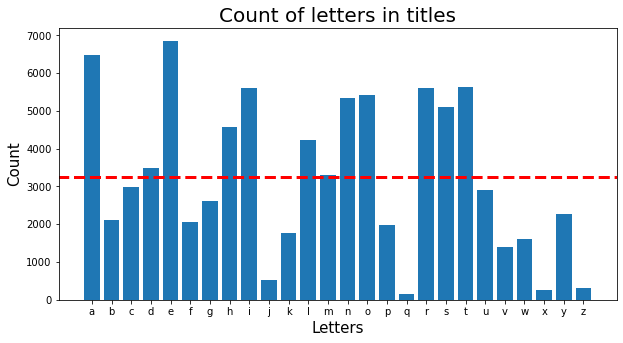

In [31]:
alphabet = []
alpha_count = []
for letter in string.ascii_lowercase:
    alphabet.append(letter)
    alpha_count.append(df.title.str.lower().str.contains(letter).sum())

avg = sum(alpha_count)/len(alpha_count)

plt.figure(figsize=(10, 5)) # dpi=300) # dpi=pixels per inch
plt.title('Count of letters in titles', fontdict={'fontsize': 20})
plt.xlabel('Letters', fontdict={'fontsize': 15})
plt.ylabel('Count', fontdict={'fontsize': 15})
plt.hlines(avg, xmin=-5, xmax=27, color='red', linewidth=3, linestyle='--')
plt.bar(alphabet, alpha_count)